# Deep Learning Project
## Classification

In [18]:
# import libraries
import numpy as np  
import pandas as pd 
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg # For displaying images
%matplotlib inline
from keras import models
# from keras import layers
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from tensorflow.keras.utils import plot_model

import os
import tensorflow as tf

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-05-26 18:44:59.902206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


True

2022-05-26 18:45:03.757193: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-05-26 18:45:03.757257: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 9648 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3e:00.0, compute capability: 7.5


In [3]:
# import zipfile

# path_to_zip_file = "/nfs/home/twd1956/DeepLearning/Project/archive.zip"
# directory_to_extract_to = "/nfs/home/twd1956/DeepLearning/Project/"

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [4]:
# File path
PATH = "/nfs/home/twd1956/DeepLearning/Project/"

train_dir = os.path.join(PATH, 'Training')
validation_dir = os.path.join(PATH, 'Validation')

BATCH_SIZE = 48
IMG_SIZE = (250, 250)

In [5]:
# Data Augumentation
train_datagen = ImageDataGenerator( 
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3
                )

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# training datast
train_gen=train_datagen.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [55]:
# validation datast
valid_gen=test_datagen.flow_from_directory(validation_dir,
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary', 
                                           shuffle=False)

Found 11649 images belonging to 2 classes.


In [8]:
kernel_s = (3,3)

In [9]:
# Custom Classification Model Architecture
model=models.Sequential()
model.add(Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_s,activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

2022-05-26 18:45:24.935552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9648 MB memory:  -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:3e:00.0, compute capability: 7.5


In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [13]:
# Train the model
history=model.fit(train_gen,
                  steps_per_epoch=70,
                  epochs=50,
                  validation_data=valid_gen,
                  validation_steps=50, 
                  verbose=1)

Epoch 1/50
70/70 [==============================] - 82s 1s/step - loss: 0.7008 - acc: 0.5750 - val_loss: 0.6640 - val_acc: 0.6671
Epoch 2/50
70/70 [==============================] - 84s 1s/step - loss: 0.6359 - acc: 0.6818 - val_loss: 0.4878 - val_acc: 0.7729
Epoch 3/50
70/70 [==============================] - 82s 1s/step - loss: 0.5417 - acc: 0.7558 - val_loss: 0.4213 - val_acc: 0.8238
Epoch 4/50
70/70 [==============================] - 82s 1s/step - loss: 0.5001 - acc: 0.7726 - val_loss: 0.3923 - val_acc: 0.8500
Epoch 5/50
70/70 [==============================] - 80s 1s/step - loss: 0.4571 - acc: 0.7994 - val_loss: 0.3233 - val_acc: 0.8650
Epoch 6/50
70/70 [==============================] - 82s 1s/step - loss: 0.4039 - acc: 0.8280 - val_loss: 0.4224 - val_acc: 0.8104
Epoch 7/50
70/70 [==============================] - 79s 1s/step - loss: 0.3837 - acc: 0.8330 - val_loss: 0.3414 - val_acc: 0.8658
Epoch 8/50
70/70 [==============================] - 81s 1s/step - loss: 0.3503 - acc: 0.84

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [15]:
# #save model to disk
# model_json = model.to_json()
# with open('model_custom.json', 'w') as json_file:
#     json_file.write(model_json)
# model.save_weights('model_custom') 

Text(0.5, 1.0, 'Loss Curves')

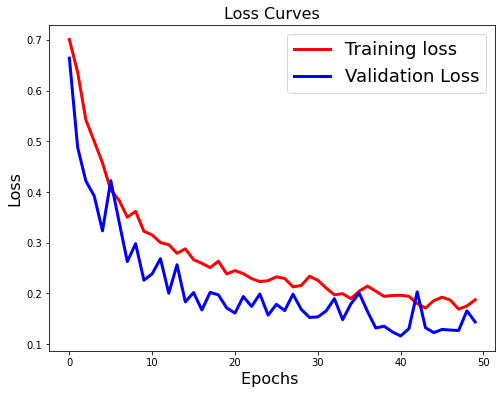

In [16]:
# Loss Curves for Training Loss and Validation Loss over Epochs
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [15]:
#testing - accuracy
scores = model.evaluate(valid_gen, batch_size=BATCH_SIZE, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

243/243 [==============================] - 38s 158ms/step - loss: 0.1467 - acc: 0.9470

Test result: 94.703 loss: 0.147


In [56]:
Y_pred = model.predict(valid_gen)

243/243 [==============================] - 36s 147ms/step


In [62]:
Y_pred 

array([[6.0592588e-06],
       [1.0070945e-03],
       [1.3304828e-03],
       ...,
       [8.9001495e-01],
       [9.9903762e-01],
       [9.9999332e-01]], dtype=float32)

In [63]:
y_pred = [1 if i[0] > 0.5 else 0 for i in Y_pred]

In [64]:
np.mean(y_pred == valid_gen.classes )

0.9470340801785561

In [65]:
print(confusion_matrix(valid_gen.classes, y_pred))

[[5696  145]
 [ 472 5336]]


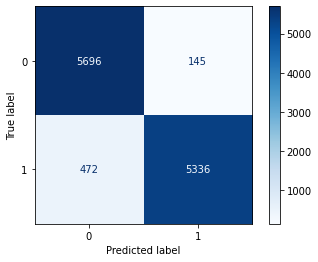

In [66]:
# Confusion Matrix for Validation Dataset
cm = confusion_matrix(valid_gen.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm) #, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
# Classification Report for Validation Dataset
print(classification_report(valid_gen.classes, y_pred) )#, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5841
           1       0.97      0.92      0.95      5808

    accuracy                           0.95     11649
   macro avg       0.95      0.95      0.95     11649
weighted avg       0.95      0.95      0.95     11649

